In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Libraries**



In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import hashlib
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2


# **Labeling Dataset**


In [ ]:
CLOUDFLARE = pd.read_csv("CLOUDFLARE VPN.csv")
CLOUDFLARE['VPN Name'] = 'cloudflare'
CLOUDFLARE['Label'] = 1
CLOUDFLARE.to_csv("CLOUDFLARE_VPN_Label.csv", index=False)
CLOUDFLARE

In [ ]:
HOTSPOTSHIELD = pd.read_csv("HOTSPOTSHIELD VPN.csv")
HOTSPOTSHIELD['VPN Name'] = 'hotspotshield'
HOTSPOTSHIELD['Label'] = 1
HOTSPOTSHIELD.to_csv("HOTSPOTSHIELD_VPN_Label.csv", index=False)
HOTSPOTSHIELD

In [ ]:
NONVPN = pd.read_csv("NON VPN.csv")
NONVPN['VPN Name'] = 'non vpn'
NONVPN['Label'] = 0
NONVPN.to_csv("NONVPN_VPN_Label.csv", index=False)
NONVPN

In [11]:
PROTON2 = pd.read_csv("PROTON 2.csv")
PROTON2['VPN Name'] = 'proton2'
PROTON2['Label'] = 1
PROTON2.to_csv("PROTON2_VPN_Label.csv", index=False)
PROTON2

,No.,Time,Source,Destination,Protocol,Length,Info,VPN Name,Label
0,1,0.000000,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,480,"61941 > 5995 [PSH, ACK] Seq=1 Ack=1 Win=260 ...",proton2,1
1,2,0.000263,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,1233,"61941 > 5995 [PSH, ACK] Seq=427 Ack=1 Win=26...",proton2,1
2,3,0.000770,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,367,"61941 > 5995 [PSH, ACK] Seq=1606 Ack=1 Win=2...",proton2,1
3,4,0.255009,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,162,"61941 > 5995 [PSH, ACK] Seq=1919 Ack=1 Win=2...",proton2,1
4,5,0.255149,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,163,"61941 > 5995 [PSH, ACK] Seq=2027 Ack=1 Win=2...",proton2,1
...,...,...,...,...,...,...,...,...,...
207,208,10.670630,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,66,[TCP Dup ACK 207#1] 61941 > 5995 [ACK] Seq=2...,proton2,1
208,209,10.670674,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,54,61941 > 5995 [ACK] Seq=25277 Ack=39225 Win=2...,proton2,1
209,210,10.671628,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,120,"61941 > 5995 [PSH, ACK] Seq=25277 Ack=39225 ...",proton2,1
210,211,10.671914,192.168.1.10,unn-138-199-7-235.datapacket.com,TCP,120,"61941 > 5995 [PSH, ACK] Seq=25343 Ack=39225 ...",proton2,1


In [12]:
PROTON = pd.read_csv("PROTON.csv")
PROTON['VPN Name'] = 'proton'
PROTON['Label'] = 1
PROTON.to_csv("PROTON_VPN_Label.csv", index=False)
PROTON

,No.,Time,Source,Destination,Protocol,Length,Info,VPN Name,Label
0,1,0.000000,52.123.164.111,192.168.1.10,TLSv1.2,1176,Application Data,proton,1
1,2,0.953129,192.168.1.10,unn-138-199-7-235.datapacket.com,TLSv1.2,190,Application Data,proton,1
2,3,0.953326,192.168.1.10,unn-138-199-7-235.datapacket.com,TLSv1.2,190,Application Data,proton,1
3,4,1.117090,unn-138-199-7-235.datapacket.com,192.168.1.10,TCP,56,443 > 61873 [ACK] Seq=1 Ack=273 Win=1364 Len=0,proton,1
4,5,1.117090,unn-138-199-7-235.datapacket.com,192.168.1.10,TLSv1.2,436,"Application Data, Application Data",proton,1
...,...,...,...,...,...,...,...,...,...
326,327,4.072247,unn-138-199-7-235.datapacket.com,192.168.1.10,TLSv1.2,276,"Application Data, Application Data",proton,1
327,328,4.091197,192.168.1.10,unn-138-199-7-235.datapacket.com,TLSv1.2,142,Application Data,proton,1
328,329,4.138505,192.168.1.10,unn-138-199-7-235.datapacket.com,TLSv1.2,158,Application Data,proton,1
329,330,4.158069,unn-138-199-7-235.datapacket.com,192.168.1.10,TCP,56,443 > 61873 [ACK] Seq=73737 Ack=39249 Win=17...,proton,1


In [13]:
TURBO = pd.read_csv("TURBO VPN.csv")
TURBO['VPN Name'] = 'turbo'
TURBO['Label'] = 1
TURBO.to_csv("turbo_VPN_Label.csv", index=False)
TURBO

,No.,Time,Source,Destination,Protocol,Length,Info,VPN Name,Label
0,1,0.000000,157.245.196.106,192.168.1.10,TCP,58,"443 > 63235 [PSH, ACK] Seq=1 Ack=1 Win=501 L...",turbo,1
1,2,0.000063,192.168.1.10,157.245.196.106,TCP,54,"63235 > 443 [RST, ACK] Seq=1 Ack=5 Win=0 Len=0",turbo,1
2,3,0.004878,157.245.196.106,192.168.1.10,TCP,54,"443 > 63235 [FIN, ACK] Seq=5 Ack=1 Win=501 L...",turbo,1
3,4,0.015786,192.168.1.10,157.245.196.106,SSL,1061,Continuation Data,turbo,1
4,5,0.022482,157.245.196.106,192.168.1.10,SSL,131,Continuation Data,turbo,1
...,...,...,...,...,...,...,...,...,...
366,367,5.161256,192.168.1.10,157.245.196.106,TCP,54,63220 > 443 [ACK] Seq=5134 Ack=166025 Win=51...,turbo,1
367,368,5.225582,157.245.196.106,192.168.1.10,SSL,568,Continuation Data,turbo,1
368,369,5.226168,192.168.1.10,server-3-160-67-82.dxb53.r.cloudfront.net,TCP,55,[TCP Keep-Alive] 62988 > 443 [ACK] Seq=1 Ack...,turbo,1
369,370,5.261433,server-3-160-67-82.dxb53.r.cloudfront.net,192.168.1.10,TCP,66,[TCP Keep-Alive ACK] 443 > 62988 [ACK] Seq=1...,turbo,1


# **Combinig and Shuffling Dataset**

In [23]:
CLOUDFLARE = pd.read_csv("CLOUDFLARE_VPN_Label.csv")
HOTSPOTSHIELD = pd.read_csv("HOTSPOTSHIELD_VPN_Label.csv")
NONVPN = pd.read_csv("NONVPN_VPN_Label.csv")
PROTON2 = pd.read_csv("PROTON2_VPN_Label.csv")
PROTON = pd.read_csv("PROTON_VPN_Label.csv")
TURBO = pd.read_csv("turbo_VPN_Label.csv")

combined_data = pd.concat([CLOUDFLARE, HOTSPOTSHIELD, NONVPN, PROTON2, PROTON, TURBO], ignore_index=True)

combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

combined_data.to_csv("Combined_Shuffled_VPN.csv", index=False)

combined_data

,No.,Time,Source,Destination,Protocol,Length,Info,VPN Name,Label
0,243,10.322392,192.168.1.10,wn-in-f188.1e100.net,TCP,55,62232 > 443 [ACK] Seq=1 Ack=1 Win=256 Len=1 ...,non vpn,0
1,217,2.993999,unn-138-199-7-235.datapacket.com,192.168.1.10,TLSv1.2,196,"Application Data, Application Data",proton,1
2,153,2.825047,unn-138-199-7-235.datapacket.com,192.168.1.10,TLSv1.2,99,Application Data,proton,1
3,222,3.726396,192.168.1.10,172.67.68.211,TLSv1.2,536,Application Data,non vpn,0
4,336,4.710462,157.245.196.106,192.168.1.10,TCP,1506,[TCP Retransmission] 443 > 63220 [ACK] Seq=1...,turbo,1
...,...,...,...,...,...,...,...,...,...
2562,908,12.733191,www.google.com,192.168.1.10,QUIC,83,"Handshake, SCID=f4149fd2ecee03cc",non vpn,0
2563,365,12.255947,172.67.68.211,192.168.1.10,TCP,1506,[TCP Out-Of-Order] 443 > 62267 [ACK] Seq=156...,non vpn,0
2564,400,12.257217,192.168.1.10,172.67.68.211,TCP,82,[TCP Dup ACK 398#2] 62267 > 443 [ACK] Seq=66...,non vpn,0
2565,564,12.341241,172.67.68.211,192.168.1.10,TCP,1506,[TCP Out-Of-Order] 443 > 62267 [ACK] Seq=299...,non vpn,0


# **Data Cleaning**

In [24]:
combined_data['Label'].value_counts()

,count
Label,
1,1645
0,922


In [25]:
combined_data.isnull().sum()

,0
No.,0
Time,0
Source,0
Destination,0
Protocol,0
Length,0
Info,0
VPN Name,0
Label,0


In [26]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          2567 non-null   int64  
 1   Time         2567 non-null   float64
 2   Source       2567 non-null   object 
 3   Destination  2567 non-null   object 
 4   Protocol     2567 non-null   object 
 5   Length       2567 non-null   int64  
 6   Info         2567 non-null   object 
 7   VPN Name     2567 non-null   object 
 8   Label        2567 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 180.6+ KB


In [27]:
combined_data.drop(columns=['No.', 'VPN Name'], inplace=True)

In [28]:
combined_data

,Time,Source,Destination,Protocol,Length,Info,Label
0,10.322392,192.168.1.10,wn-in-f188.1e100.net,TCP,55,62232 > 443 [ACK] Seq=1 Ack=1 Win=256 Len=1 ...,0
1,2.993999,unn-138-199-7-235.datapacket.com,192.168.1.10,TLSv1.2,196,"Application Data, Application Data",1
2,2.825047,unn-138-199-7-235.datapacket.com,192.168.1.10,TLSv1.2,99,Application Data,1
3,3.726396,192.168.1.10,172.67.68.211,TLSv1.2,536,Application Data,0
4,4.710462,157.245.196.106,192.168.1.10,TCP,1506,[TCP Retransmission] 443 > 63220 [ACK] Seq=1...,1
...,...,...,...,...,...,...,...
2562,12.733191,www.google.com,192.168.1.10,QUIC,83,"Handshake, SCID=f4149fd2ecee03cc",0
2563,12.255947,172.67.68.211,192.168.1.10,TCP,1506,[TCP Out-Of-Order] 443 > 62267 [ACK] Seq=156...,0
2564,12.257217,192.168.1.10,172.67.68.211,TCP,82,[TCP Dup ACK 398#2] 62267 > 443 [ACK] Seq=66...,0
2565,12.341241,172.67.68.211,192.168.1.10,TCP,1506,[TCP Out-Of-Order] 443 > 62267 [ACK] Seq=299...,0


Balance the dataset

In [36]:
label_encoder = LabelEncoder()

combined_data['Source'] = combined_data['Source'].astype(str)  # Convert to string type if not already
combined_data['Source'] = label_encoder.fit_transform(combined_data['Source'])

combined_data['Destination'] = combined_data['Destination'].astype(str)  # Convert to string type if not already
combined_data['Destination'] = label_encoder.fit_transform(combined_data['Destination'])

# Encode Info using Label Encoding
combined_data['Info'] = combined_data['Info'].astype(str)  # Convert to string type if not already
combined_data['Info'] = label_encoder.fit_transform(combined_data['Info'])

# Normalize numerical columns
scaler = MinMaxScaler()
combined_data[['Time', 'Length']] = scaler.fit_transform(combined_data[['Time', 'Length']])


In [42]:
combined_data['Protocol'] = combined_data['Protocol'].astype(str)  # Convert to string type if not already
combined_data['Protocol'] = label_encoder.fit_transform(combined_data['Protocol'])

# **Splitting the dataset into test and train**

In [43]:
train, test = train_test_split(combined_data,test_size=0.2,random_state=16)
train, val = train_test_split(train,test_size=0.2,random_state=16)

x_train, y_train = train.drop(columns=['Label']), train[['Label']]
x_test, y_test = test.drop(columns=['Label']), test[['Label']]
x_val, y_val = val.drop(columns=['Label']), val[['Label']]

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, 443 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         1642 non-null   float64
 1   Source       1642 non-null   int64  
 2   Destination  1642 non-null   int64  
 3   Protocol     1642 non-null   int64  
 4   Length       1642 non-null   float64
 5   Info         1642 non-null   int64  
 6   Label        1642 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 102.6 KB


In [45]:
num_col = list(set(x_train.columns))

# **Data Correlation**

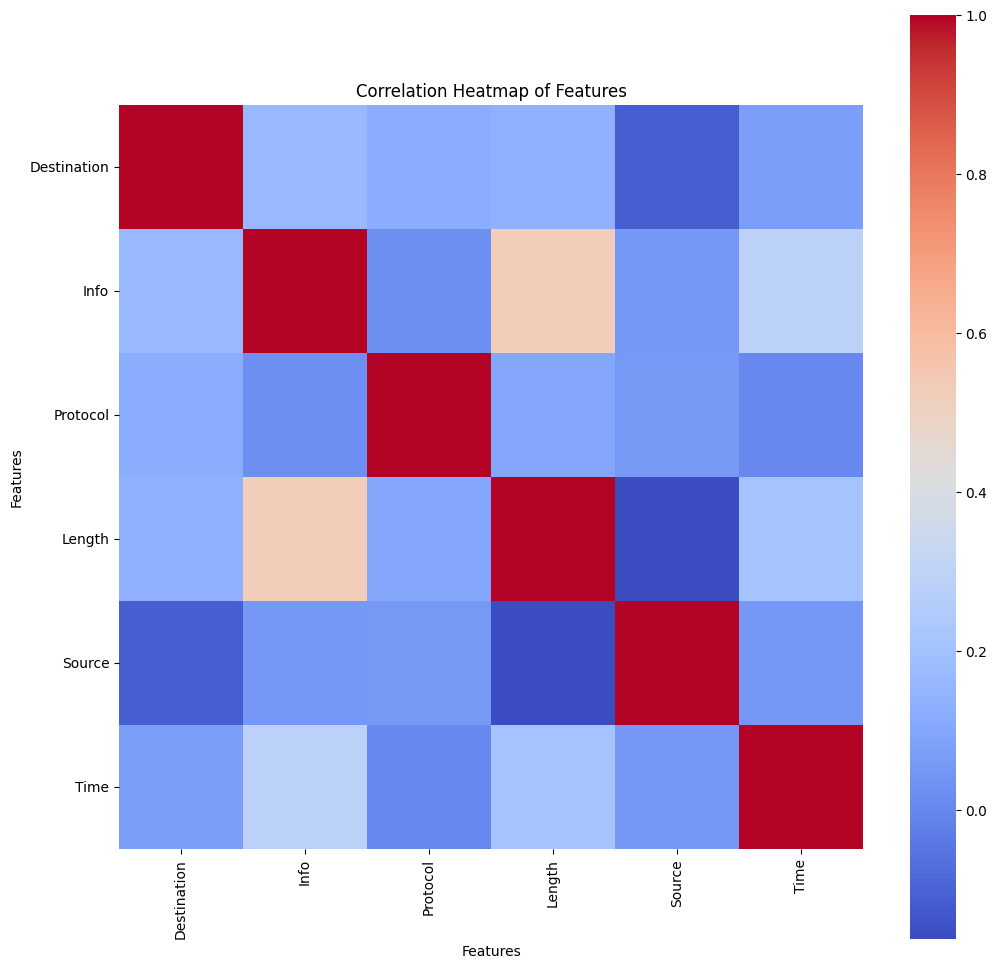

In [47]:
correlation_matrix = train[num_col].corr()


plt.figure(figsize=(12, 12))


sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap of Features')

# Rotate x-axis labels for better readability with many features
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()


# **Data Distribution**

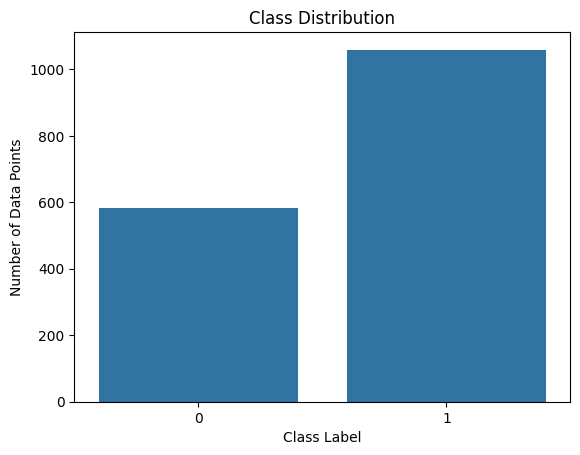

In [48]:
labels = train['Label']

# Create a count plot with Seaborn
sns.countplot(x=labels)

# Add labels and title
plt.xlabel('Class Label')
plt.ylabel('Number of Data Points')
plt.title('Class Distribution')

# Rotate x-axis labels for better readability if there are many classes
plt.xticks(rotation=0)

# Show the plot
plt.show()


# **Data Preprocessing**

1.Data encoding : find the categorical features and use OneHotEncoder

2.Data Normalization : find numerical features and use StandaraScaler


In [49]:
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])
x_train[num_col] = scaler.transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])
x_val[num_col] = scaler.transform(x_val[num_col])

In [50]:
print("x_train shape", x_train.shape)
print("x_test shape", y_train.shape)
print("x_val shape", x_test.shape)

x_train shape (1642, 6)
x_test shape (1642, 1)
x_val shape (514, 6)


# **Training Model BiLSTM with Attention Mechanism**

In [119]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Dropout, Bidirectional, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load the model
loaded_model = load_model('my_model.h5')

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 6, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 6, 256)         │        133,120 │ input_layer_4[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_4 (Attention)   │ (None, 6, 256)         │              0 │ bidirectional_2[0][0], │
│                           │                        │                │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 1536)           │              0 │ attention_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │         98,368 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64)             │            256 │ dense_6[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64)             │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             65 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 231,809 (905.50 KB)

 Trainable params: 231,681 (905.00 KB)

 Non-trainable params: 128 (512.00 B)

In [120]:
# Optimizer with a learning rate schedule (optional)
optimizer = Adam(learning_rate=0.001)

# Compile the model
loaded_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = loaded_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6600 - loss: 0.6743 - val_accuracy: 0.6770 - val_loss: 0.6522
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7715 - loss: 0.5154 - val_accuracy: 0.6654 - val_loss: 0.6012
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8687 - loss: 0.3494 - val_accuracy: 0.7471 - val_loss: 0.5558
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8964 - loss: 0.2899 - val_accuracy: 0.7393 - val_loss: 0.5387
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8895 - loss: 0.2909 - val_accuracy: 0.8988 - val_loss: 0.4709
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9076 - loss: 0.2574 - val_accuracy: 0.9086 - val_loss: 0.4179
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9071 - loss: 0.2558 - val_accuracy: 0.9086 - val_loss: 0.3688
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9070 - loss: 0.2499 - val_accuracy: 0.8658 - val

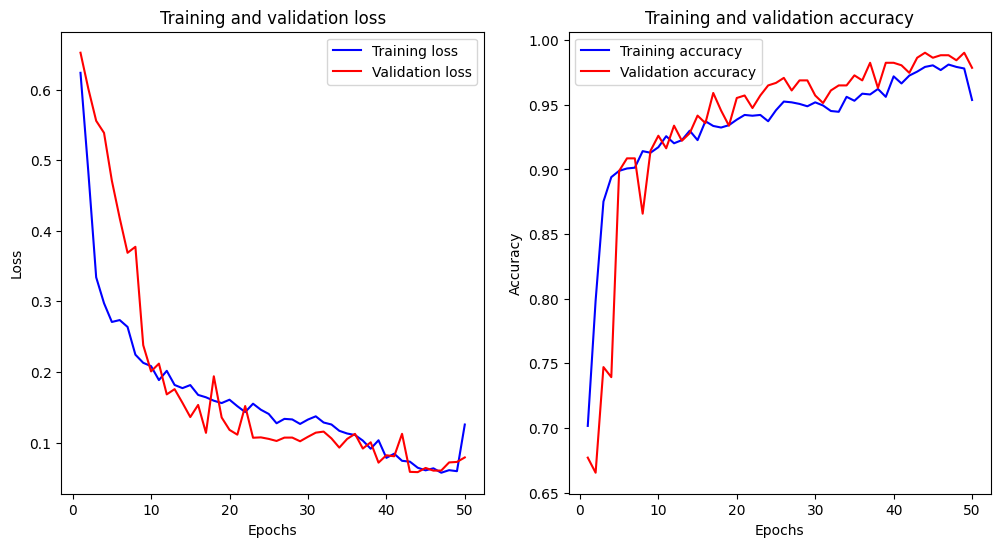

In [121]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# **Evalutaing Model**

In [123]:
loss, accuracy = loaded_model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9748 - loss: 0.1022
Test Loss: 0.07885660231113434, Test Accuracy: 0.9785992503166199


# **Predicting Model**

In [124]:
y_pred = loaded_model.predict(x_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [125]:
# Check data type and shape after correction
print(f"y_test shape: {y_test.shape}, y_pred shape: {y_pred.shape}")

y_test shape: (514, 1), y_pred shape: (514, 1)


# **Finding Confusion Matrix, F1 Score, Precision, Recall, Accurarcy and Heatmap**

In [126]:
threshold = 0.5
binary_labels = (y_pred > threshold).astype(int)
y_pred = binary_labels

# **Accuracy & F1 Score**

In [127]:
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             confusion_matrix,
                             precision_score,
                             recall_score)

import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9785992217898832
F1 Score: 0.9839883551673945


# **Confusion Matrix**

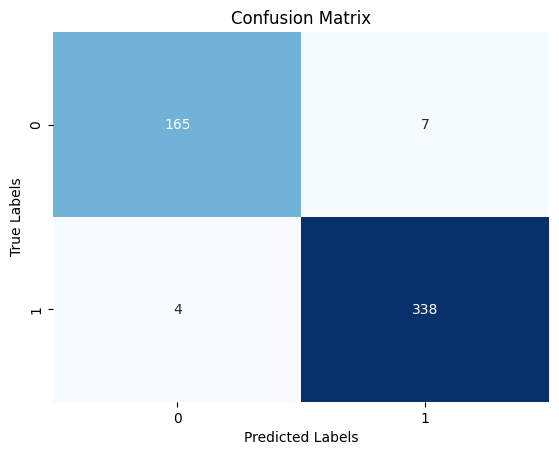

In [128]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Precision**

In [129]:
precision = precision_score(y_test, y_pred)

print("Precision:", precision)

Precision: 0.9797101449275363


# **Recall**

In [130]:
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Recall: 0.9883040935672515
